## Introduction

Muhammad Bintang Ramadhan  
FTDS Hacktiv8 batch 08

Menganalisa sebuah dataset dari character-character pokemon yang memiliki data berdasarkan dari hit points, attack, defence, speed, special attack dan special defence dari sebuah character tertentu.
Objective yang ingin dicapai adalah mencari character terkuat yang memiliki skill 2 'Water'.

## Import Pustaka

In [28]:
import numpy as np
import pandas as pd

## Data Loading

In [29]:
df = pd.read_csv('Pokemon.csv') #Input data internal menggunakan pandas, dan dimasukan ke dalam variabel df

In [30]:
df.head() #Melihat 5 data teratas

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [31]:
df.tail() #Melihat 5 data terbawah

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


## Data Cleaning

In [32]:
#mengcopy dari dataset semula agar ketika memanipulating tidak merubah dataset semulanya.
pokemon = df.copy()

Rename Columns

In [33]:
#mengganti nama colum dan mengeceknya terlebih dahulu
pokemon.rename(
    columns={'#' : 'ID_Pokemon', 'Name' : 'Character', 'Type 1' : 'Skill_1', 'Type 2' : 'Skill_2', 'Total' : 'Overall_Power', 'HP' : 'Hitpoints', 'Attack' : 'Att', 'Defense' : 'Def', 'Sp. Atk' : 'Sp_Att', 'Sp. Def' : 'Sp_Def', 'Speed' : 'Speed'}
)

,ID_Pokemon,Character,Skill_1,Skill_2,Overall_Power,Hitpoints,Att,Def,Sp_Att,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [34]:
#setelah sesuai baru dipermanenkan perubahannya
pokemon = pokemon.rename(
    columns={'#' : 'ID_Pokemon', 'Name' : 'Character', 'Type 1' : 'Skill_1', 'Type 2' : 'Skill_2', 'Total' : 'Overall_Power', 'HP' : 'Hitpoints', 'Attack' : 'Att', 'Defense' : 'Def', 'Sp. Atk' : 'Sp_Att', 'Sp. Def' : 'Sp_Def', 'Speed' : 'Speed'}
)

In [35]:
pokemon.head() #Melihat 5 data teratas untuk mengecek kembali column yang diubah

,ID_Pokemon,Character,Skill_1,Skill_2,Overall_Power,Hitpoints,Att,Def,Sp_Att,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Delete Columns

In [36]:
#Menhapus Column yang bernama 'Generation' dan 'Legendary'
pokemon.drop(['Generation', 'Legendary'], axis=1, inplace=True)

In [37]:
pokemon.head()

,ID_Pokemon,Character,Skill_1,Skill_2,Overall_Power,Hitpoints,Att,Def,Sp_Att,Sp_Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


Missing Value

In [38]:
pokemon.info() #Mengecek data yang non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_Pokemon     800 non-null    int64 
 1   Character      800 non-null    object
 2   Skill_1        800 non-null    object
 3   Skill_2        414 non-null    object
 4   Overall_Power  800 non-null    int64 
 5   Hitpoints      800 non-null    int64 
 6   Att            800 non-null    int64 
 7   Def            800 non-null    int64 
 8   Sp_Att         800 non-null    int64 
 9   Sp_Def         800 non-null    int64 
 10  Speed          800 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 68.9+ KB


In [44]:
#Menghapus semua yang kosong dan dimasukan kedalam variabel pokemon_clean
pokemon['Skill_2'].fillna( value='none', inplace=True)

In [46]:
#mengecek data setelah melakukan penghapusan yang kosong
pokemon.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID_Pokemon     800 non-null    int64 
 1   Character      800 non-null    object
 2   Skill_1        800 non-null    object
 3   Skill_2        800 non-null    object
 4   Overall_Power  800 non-null    int64 
 5   Hitpoints      800 non-null    int64 
 6   Att            800 non-null    int64 
 7   Def            800 non-null    int64 
 8   Sp_Att         800 non-null    int64 
 9   Sp_Def         800 non-null    int64 
 10  Speed          800 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 68.9+ KB


## Explorasi Data

Data Query

In [47]:
pokemon.head()

,ID_Pokemon,Character,Skill_1,Skill_2,Overall_Power,Hitpoints,Att,Def,Sp_Att,Sp_Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,none,309,39,52,43,60,50,65


In [48]:
#Query data 1 untuk mengetahui character yang memiliki skill 1 Fire dan memilik att & def diatas 90
pokemon[
    (pokemon['Skill_1'] == 'Fire') &
    (pokemon['Att'] > 90) &
    (pokemon['Def'] > 90)
]

,ID_Pokemon,Character,Skill_1,Skill_2,Overall_Power,Hitpoints,Att,Def,Sp_Att,Sp_Def,Speed
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100
354,323,CameruptMega Camerupt,Fire,Ground,560,70,120,100,145,105,20
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70


In [50]:
#Query data 2 untuk mengetahui character yang meimiliki skill 1 grass dan skill 2 Ground yang memiliki overall power diatas 500 
pokemon[
    (pokemon['Skill_1'] == 'Grass') &
    (pokemon['Skill_2'] == 'Ground') &
    (pokemon['Overall_Power'] > 500)
]

,ID_Pokemon,Character,Skill_1,Skill_2,Overall_Power,Hitpoints,Att,Def,Sp_Att,Sp_Def,Speed
434,389,Torterra,Grass,Ground,525,95,109,105,75,85,56


In [ ]:
#Query data 3 untuk mengetahui character yang meimiliki skill 1 Dragon dan memiliki special attack & special defence diatas 100
pokemon_clean[
    (pokemon_clean['Skill_1'] == 'Dragon') &
    (pokemon_clean['Sp_Att'] >100) &
    (pokemon_clean['Sp_Def'] > 100)
]

,ID_Pokemon,Character,Skill_1,Skill_2,Overall_Power,Hitpoints,Att,Def,Sp_Att,Sp_Def,Speed
366,334,AltariaMega Altaria,Dragon,Fairy,590,75,110,110,110,105,80
417,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110
418,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110
419,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110
420,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110
706,643,Reshiram,Dragon,Fire,680,100,120,100,150,120,90


Grouping

In [ ]:
#Grouping data 1
pokemon_clean.groupby('Character')['Hitpoints'].sum()

Character
Abomasnow                   90
AbomasnowMega Abomasnow     90
AegislashBlade Forme        60
AegislashShield Forme       60
Aerodactyl                  80
                          ... 
Zapdos                      90
Zekrom                     100
Zubat                       40
Zweilous                    72
Zygarde50% Forme           108
Name: Hitpoints, Length: 414, dtype: int64

In [ ]:
#Grouping data 2
pokemon_clean[
    (pokemon_clean['Skill_1'] == 'Fire') #mengQuery yang memiliki skill 1 Dragon
].groupby(['Character', 'Skill_2'])['Overall_Power'].sum() #melihat character yang memiliki skill 1 Dragon, skill 2 nya apa.

Character                  Skill_2 
Blaziken                   Fighting    530
BlazikenMega Blaziken      Fighting    630
Camerupt                   Ground      460
CameruptMega Camerupt      Ground      560
Charizard                  Flying      534
CharizardMega Charizard X  Dragon      634
CharizardMega Charizard Y  Flying      634
Combusken                  Fighting    405
DarmanitanZen Mode         Psychic     540
Delphox                    Psychic     534
Emboar                     Fighting    528
Fletchinder                Flying      382
Heatran                    Steel       600
Ho-oh                      Flying      680
Infernape                  Fighting    534
Litleo                     Normal      369
Magcargo                   Rock        410
Moltres                    Flying      580
Monferno                   Fighting    405
Numel                      Ground      305
Pignite                    Fighting    418
Pyroar                     Normal      507
Talonflame        

In [ ]:
#Grouping data 3
pokemon_clean[
    (pokemon_clean['Skill_2'] == 'Water') #memFilter character yang memiliki skill2 Water
].groupby(['Character', 'Sp_Att', 'Sp_Def'])['Overall_Power'].sum() #Menggabungkan data character Sp_Att dan Sp_Def 

Character        Sp_Att  Sp_Def
Barbaracle       54      86        500
Bibarel          55      60        410
Binacle          39      56        306
Kabuto           55      45        355
Kabutops         65      70        495
Omanyte          90      55        355
Omastar          115     70        495
RotomWash Rotom  105     107       520
Sealeo           75      70        410
Skrelp           60      60        320
Spheal           55      50        290
Surskit          50      52        269
Volcanion        130     90        600
Walrein          95      90        530
Name: Overall_Power, dtype: int64

Pandas Visualization

<AxesSubplot:xlabel='Character'>

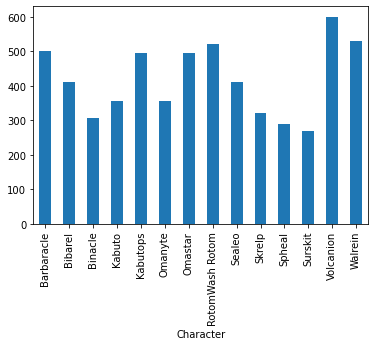

In [ ]:
pokemon_clean[
    (pokemon_clean['Skill_2'] == 'Water') #memFilter character yang memiliki skill2 Water
].groupby(['Character'])['Overall_Power'].sum().plot(kind='bar')

## Conclussion


Bahwa character terkuat yang memiliki skill 2 watera dalah'Volcanion' yang memiliki skill 1 Fire.